In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['mdata.csv']))

Saving mdata.csv to mdata (1).csv


In [ ]:
data = df.copy()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df.head(10)

,elapsedTime,numEvents,actionType,numCriticalPoints,traveledDistance,endToEndLine,largestDeviation,efficiency,a_beg_time,sum_of_angles,...,avg_jerk,sd_jerk,min_jerk,max_jerk,avg_curvature,sd_curvature,min_curvature,max_curvature,direction,userid
0,4208,114,3,70,708.37,553.48,0.00,0.78,0.01,89.75,...,-0.07,0.04,-0.16,0.00,0.00,0.36,-1.57,1.57,7,1
1,4229,175,3,109,1291.13,385.25,1.90,0.30,0.00,167.27,...,-0.09,0.06,-0.16,0.00,-0.01,0.42,-1.57,1.57,7,1
2,1674,115,3,54,1290.48,995.82,15.59,0.77,0.02,59.71,...,-0.48,1.28,-6.18,0.01,0.00,0.22,-1.57,0.79,2,1
3,510,20,3,2,17.21,14.87,1.68,0.86,0.01,7.71,...,-0.18,0.36,-1.57,0.00,0.44,0.68,-0.79,1.57,7,1
4,6061,305,3,83,1425.76,915.75,240.44,0.64,0.00,154.22,...,-0.34,0.79,-6.96,0.04,0.16,0.50,-1.57,1.57,4,1
5,1263,31,3,12,73.87,69.35,2.93,0.94,0.02,12.52,...,-0.03,0.03,-0.11,0.00,0.02,0.54,-1.57,1.57,4,1
6,1365,90,3,53,120.40,107.42,9.74,0.89,0.02,89.72,...,-0.09,0.11,-0.79,0.04,0.11,0.52,-1.57,1.57,1,1
7,1489,94,1,22,637.61,257.09,0.00,0.40,0.08,55.95,...,-0.58,1.02,-5.56,0.01,0.09,0.34,-1.57,1.57,0,1
8,832,84,3,21,331.80,283.34,0.00,0.85,0.01,42.40,...,-0.38,0.60,-2.40,0.01,0.15,0.42,-1.57,1.57,0,1
9,11031,324,3,124,6757.81,402.57,773.67,0.06,0.00,229.79,...,-0.38,4.76,-15.95,68.25,0.01,0.19,-1.57,1.11,0,1


In [ ]:
df.columns

Index(['elapsedTime', ' numEvents', ' actionType', ' numCriticalPoints',
       'traveledDistance', ' endToEndLine', ' largestDeviation', ' efficiency',
       ' a_beg_time', ' sum_of_angles', 'avgv', '  sdv', '  minv', ' maxv',
       'avgvx', ' sdvx', ' minvx', ' maxvx', 'avgvy', ' sdvy', ' minvy',
       ' maxvy', 'avga', '  sda', '  mina', ' maxa', 'avg_omega', ' sd_omega',
       ' min_omega', ' max_omega', 'avg_jerk', ' sd_jerk', ' min_jerk',
       ' max_jerk', 'avg_curvature', ' sd_curvature', ' min_curvature',
       ' max_curvature', 'direction', 'userid'],
      dtype='object')

In [ ]:
df.shape

(93100, 40)

In [ ]:
df=df.sample(frac=1)

In [ ]:
len(df['userid'].unique())

28

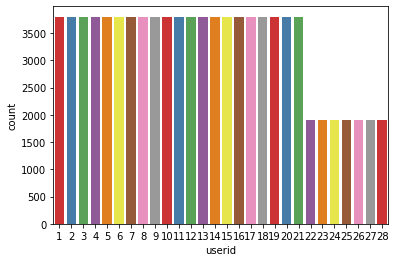

In [ ]:
sns.countplot(x = 'userid', data = df, palette = 'Set1')

In [ ]:
df.isnull().sum()

elapsedTime           0
 numEvents            0
 actionType           0
 numCriticalPoints    0
traveledDistance      0
 endToEndLine         0
 largestDeviation     0
 efficiency           0
 a_beg_time           0
 sum_of_angles        0
avgv                  0
  sdv                 0
  minv                0
 maxv                 0
avgvx                 0
 sdvx                 0
 minvx                0
 maxvx                0
avgvy                 0
 sdvy                 0
 minvy                0
 maxvy                0
avga                  0
  sda                 0
  mina                0
 maxa                 0
avg_omega             0
 sd_omega             0
 min_omega            0
 max_omega            0
avg_jerk              0
 sd_jerk              0
 min_jerk             0
 max_jerk             0
avg_curvature         0
 sd_curvature         0
 min_curvature        0
 max_curvature        0
direction             0
userid                0
dtype: int64

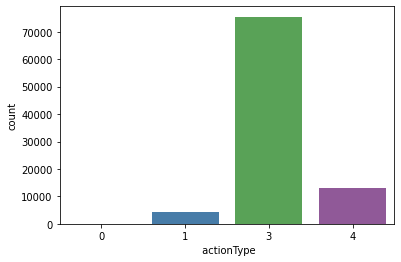

In [ ]:
sns.countplot(x = ' actionType', data = df, palette = 'Set1')

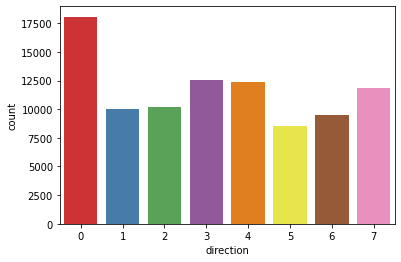

In [ ]:
sns.countplot(x = 'direction', data = df, palette = 'Set1')

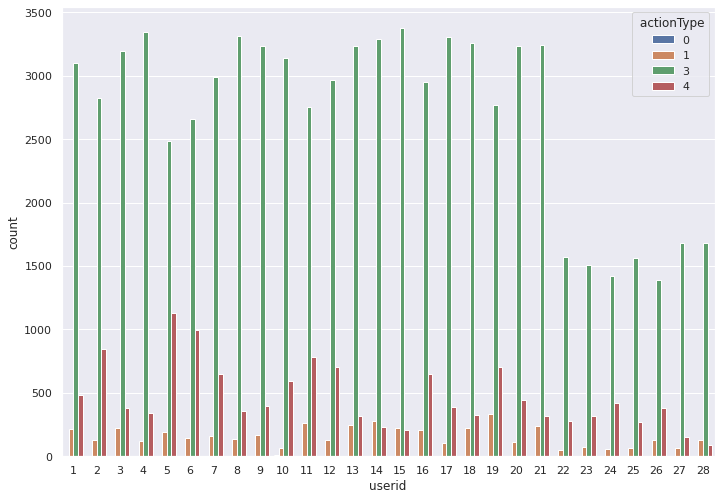

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = 'userid' , data =df, hue =' actionType')

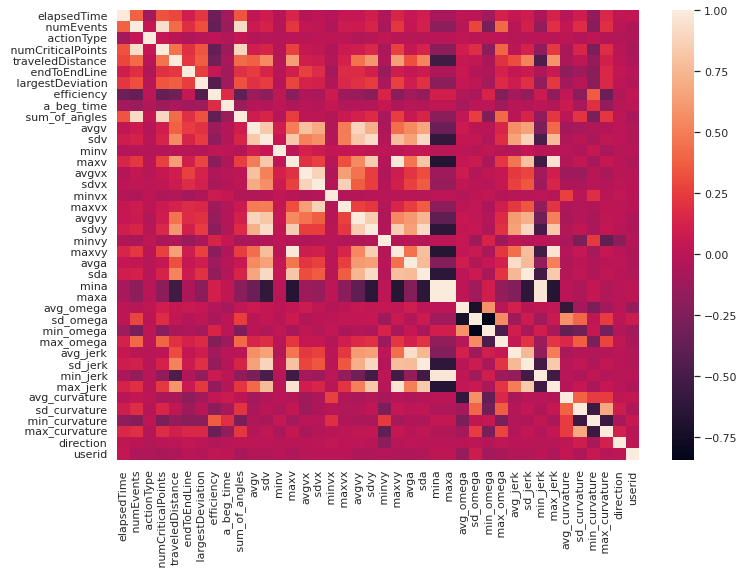

In [ ]:
corelation = df.corr()
# corelation
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = False)

In [ ]:
df[' actionType'].unique()

array([3, 1, 4, 0])

In [ ]:
X = df.drop('userid',axis=1).values
Y = df['userid']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

# **Feature Importance**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=20, criterion = 'entropy')
decision_tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', random_state=20)

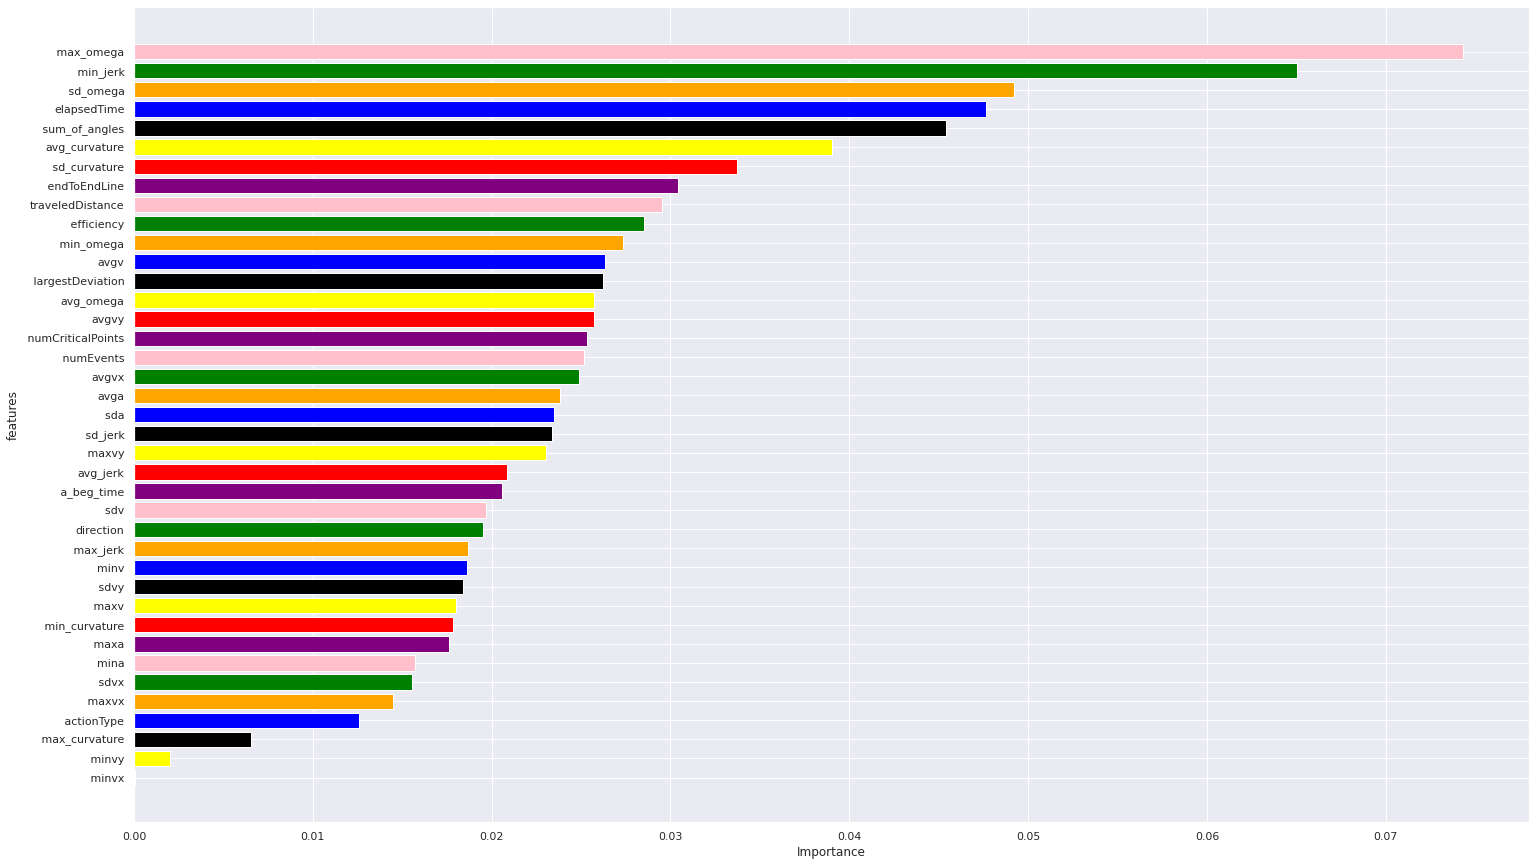

In [ ]:
feature = []
imp = []
c = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink', 'purple']*5

for i,col in enumerate(df.drop('userid',axis=1)):
    feature.append(col)
    imp.append(decision_tree.feature_importances_[i])

keydict = dict(zip(feature, imp))
feature.sort(key=keydict.get)
imp.sort()

fig = plt.figure(figsize = (25, 15))
plt.barh(feature, imp, color = c)
 
plt.ylabel("features")
plt.xlabel("Importance")
plt.show()

#**Models**:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 100,test_size=0.3,shuffle=True)

In [ ]:
X_train.shape

(65170, 39)

In [ ]:
X_test.shape

(27930, 39)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
def roc(y_test,y_pred):

  for i in range(1,29):
    ytrue_=[]
    ytest_=[]
    # df_ = X_test.copy()
    for y in range(len(y_test)):
      if(y_test[y]==i):
        ytrue_.append(1)
      else:
        ytrue_.append(0) 
      if(y_pred[y]==i):
          ytest_.append(1)
      else:
        ytest_.append(0)
    fpr, tpr, _ = metrics.roc_curve(ytrue_,  ytest_)
    auc = metrics.roc_auc_score(ytrue_, ytest_)
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc)+ "for class="+str(i+1))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

## **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion='entropy',splitter='best' ) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

0.7109917651271035


In [ ]:
y_test = y_test.values.tolist()

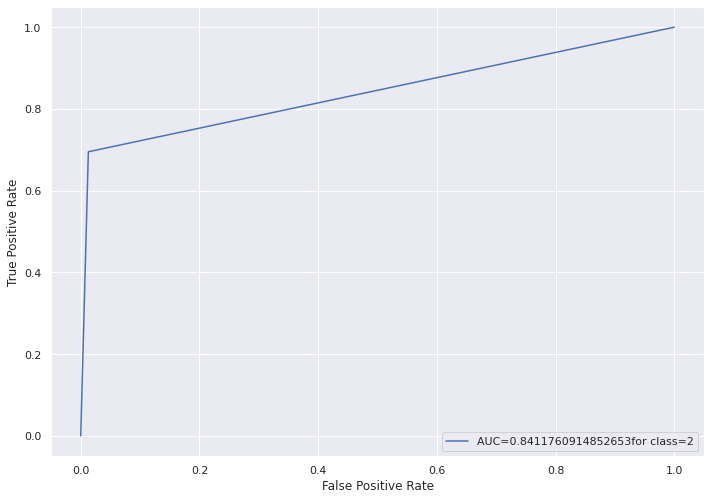

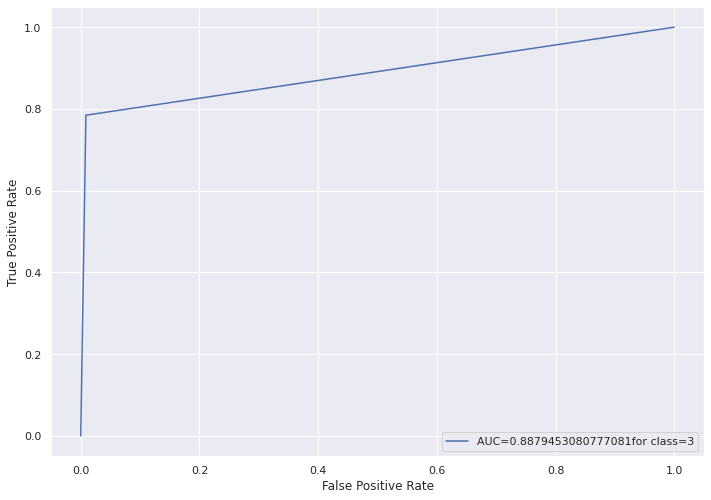

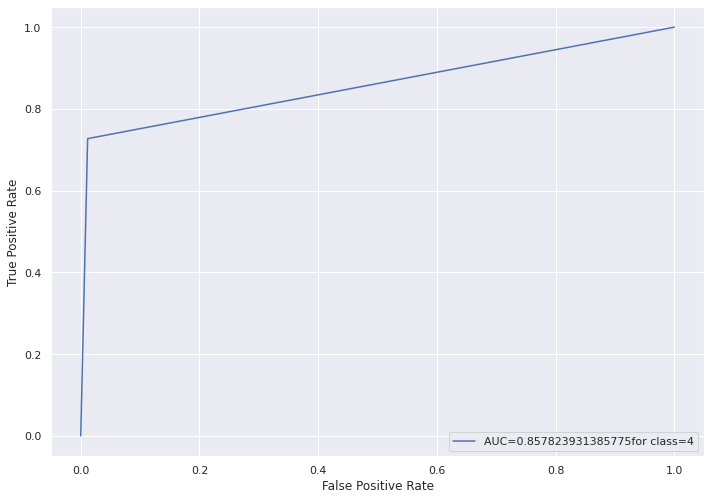

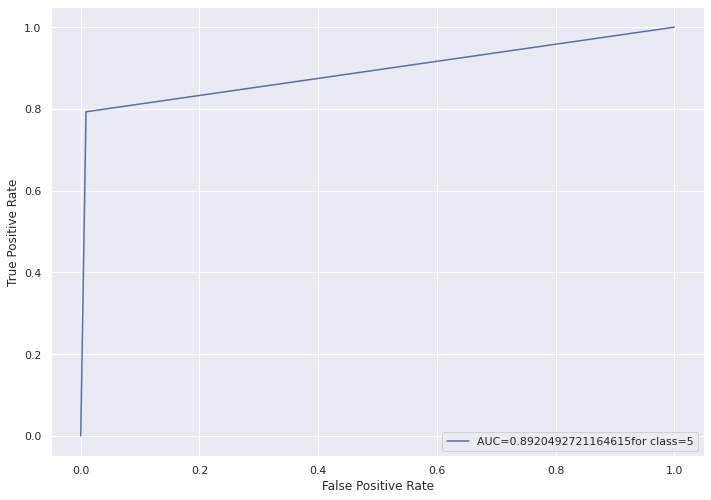

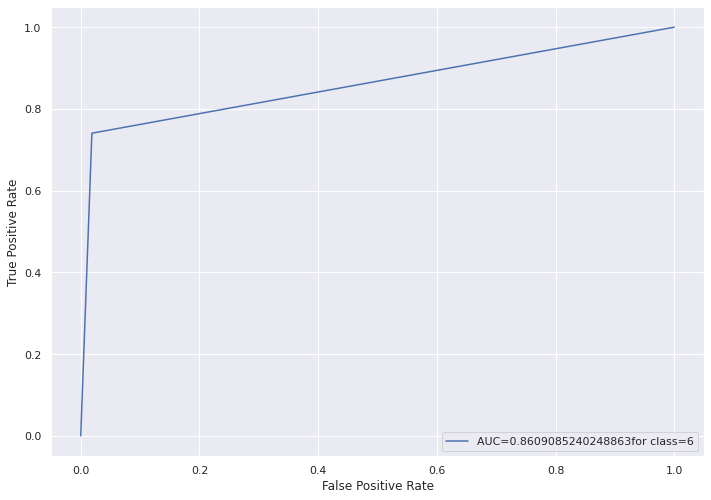

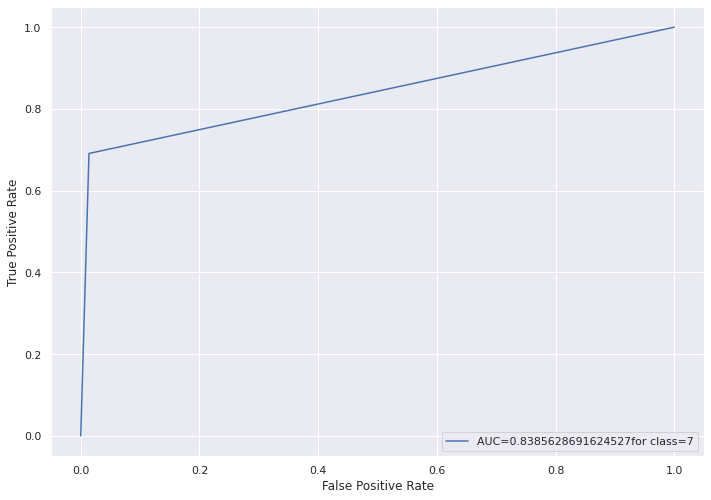

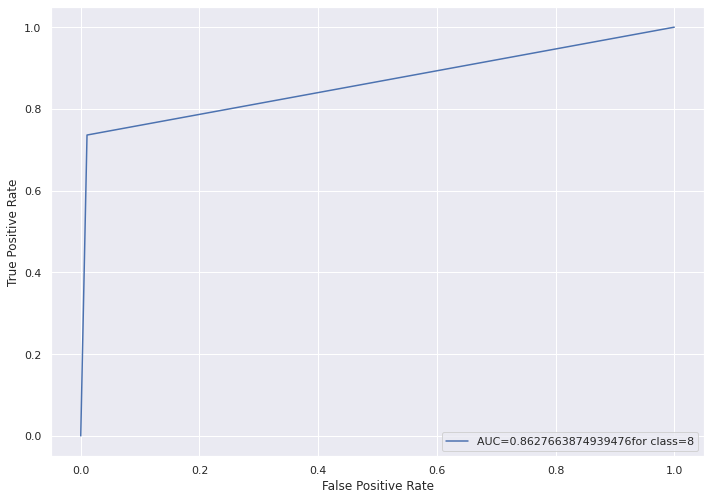

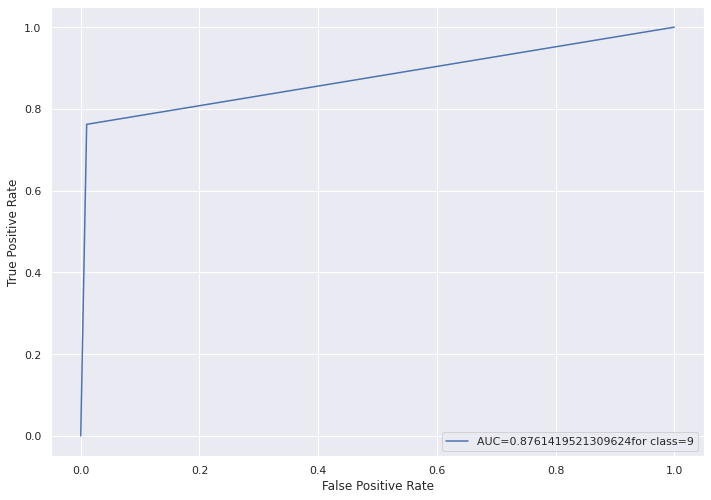

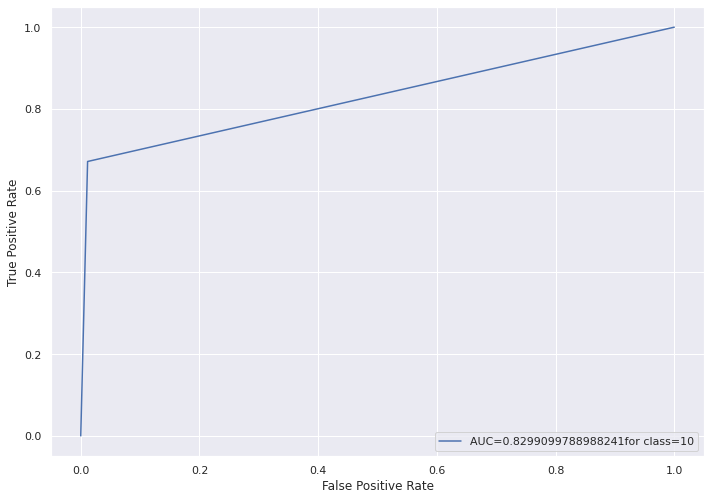

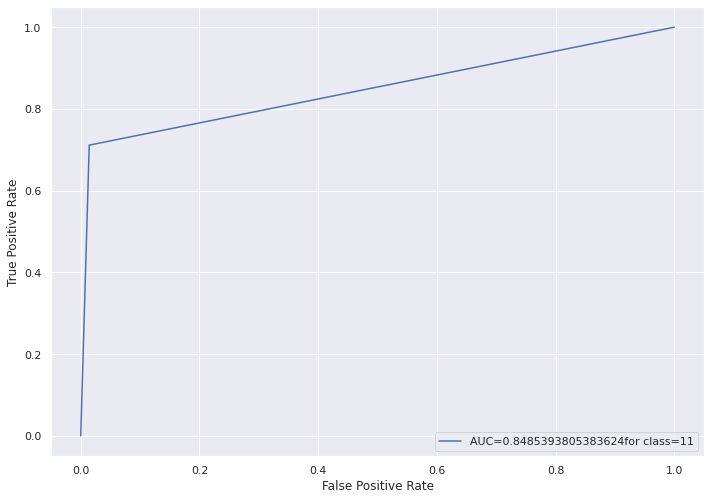

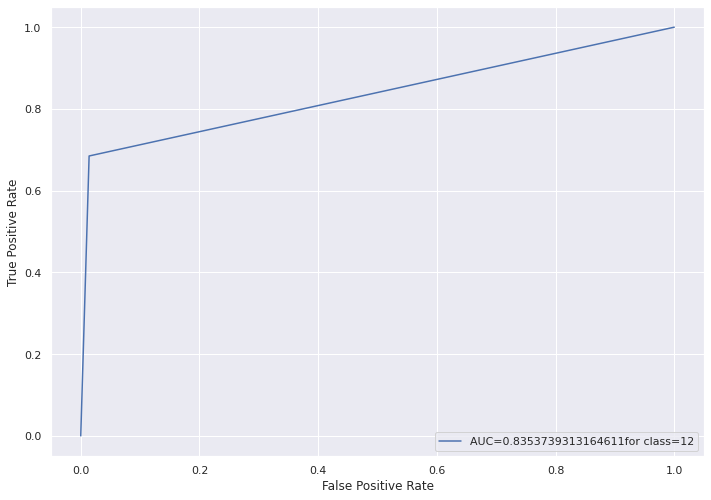

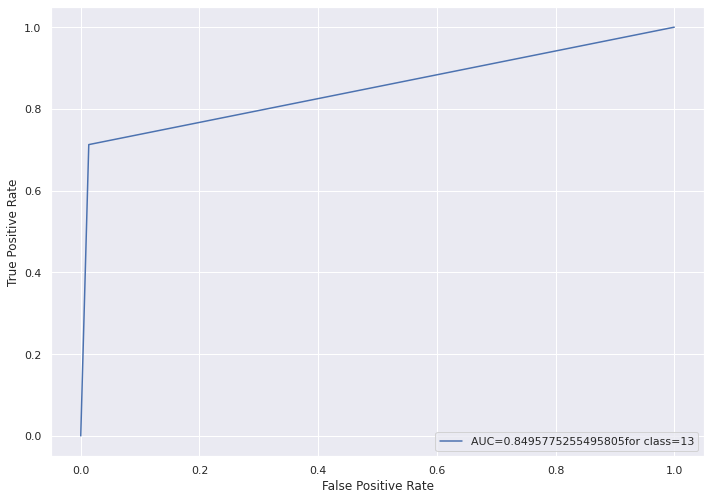

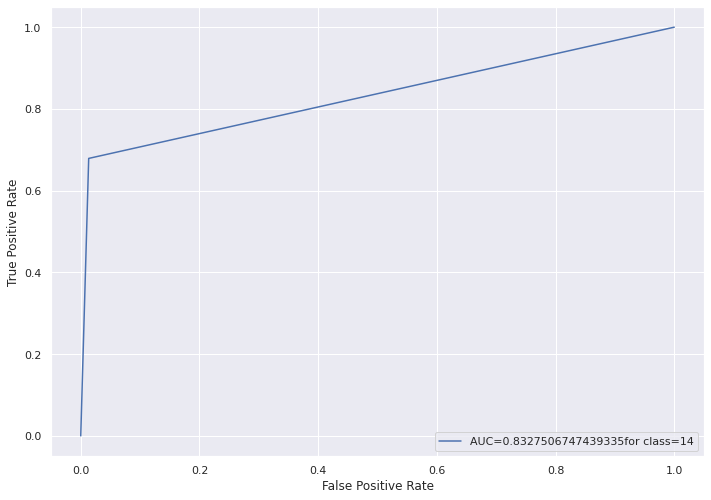

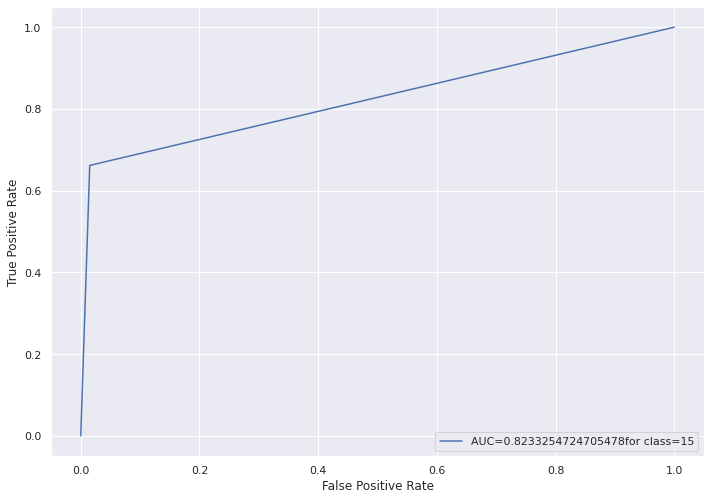

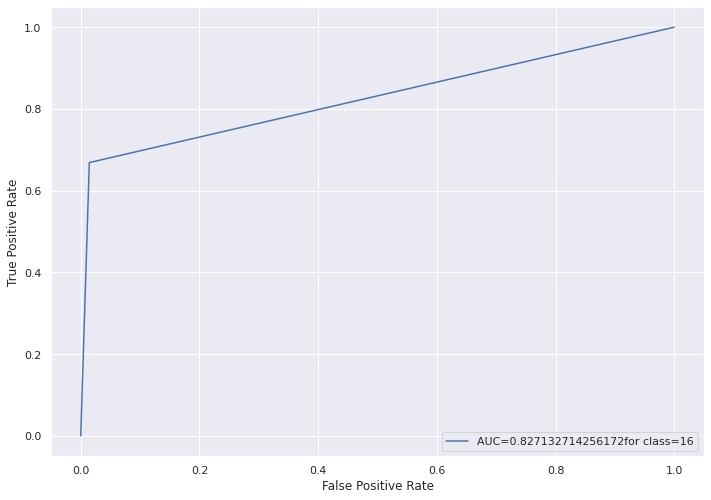

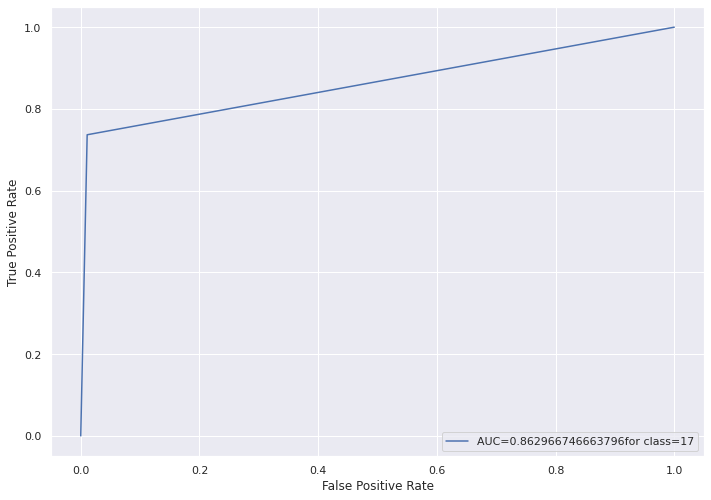

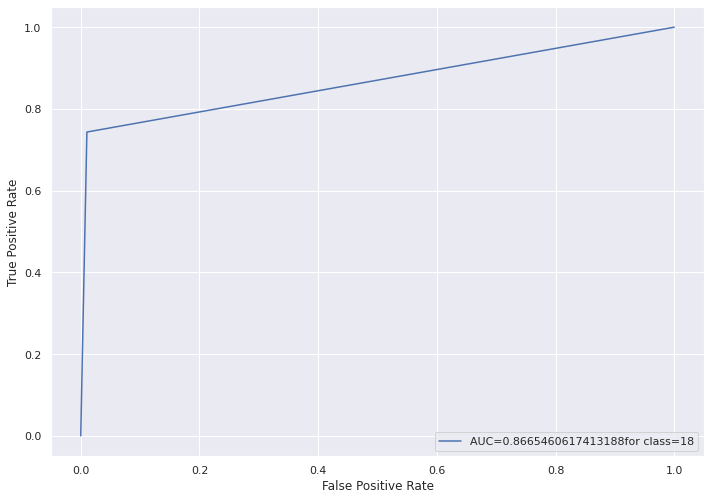

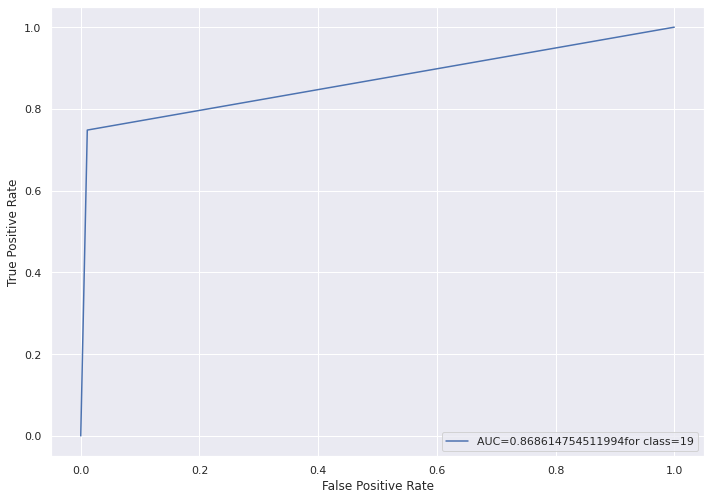

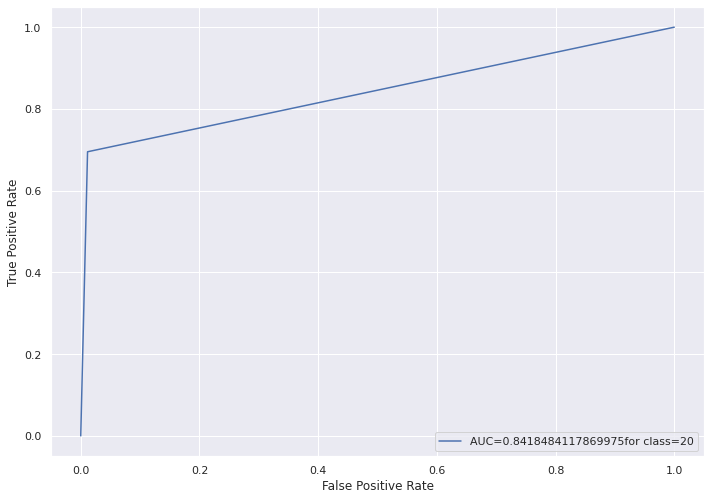

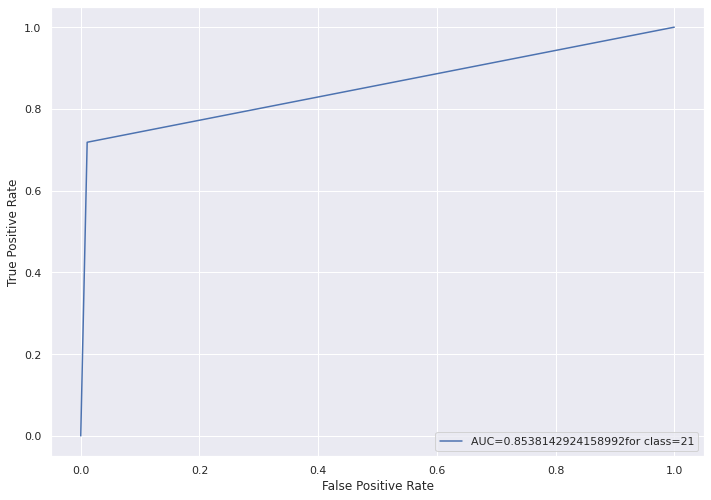

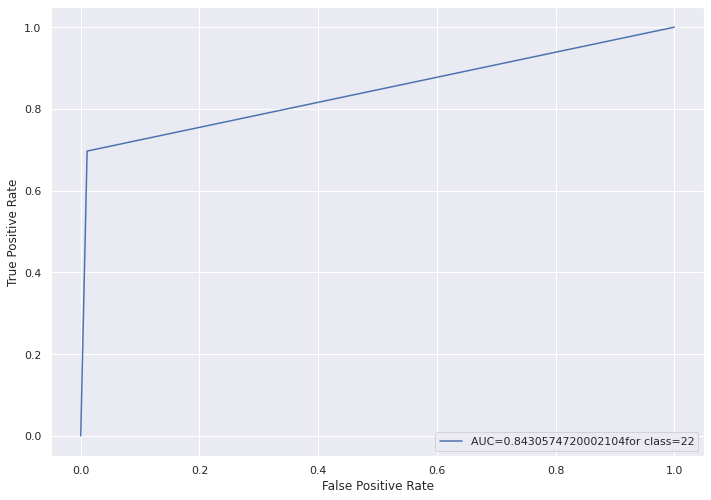

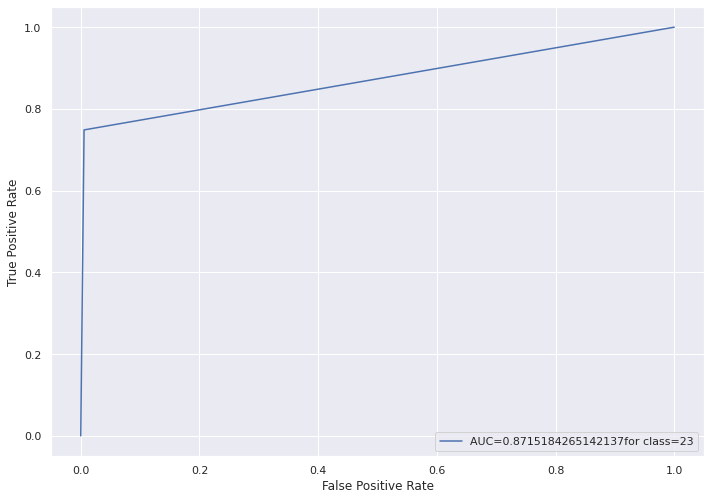

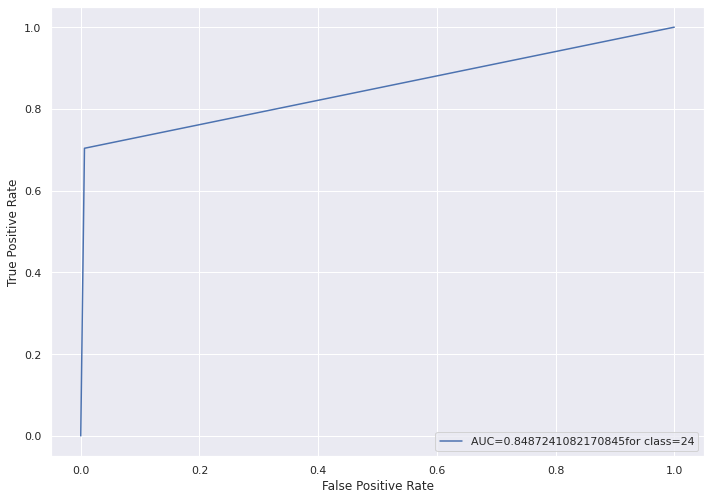

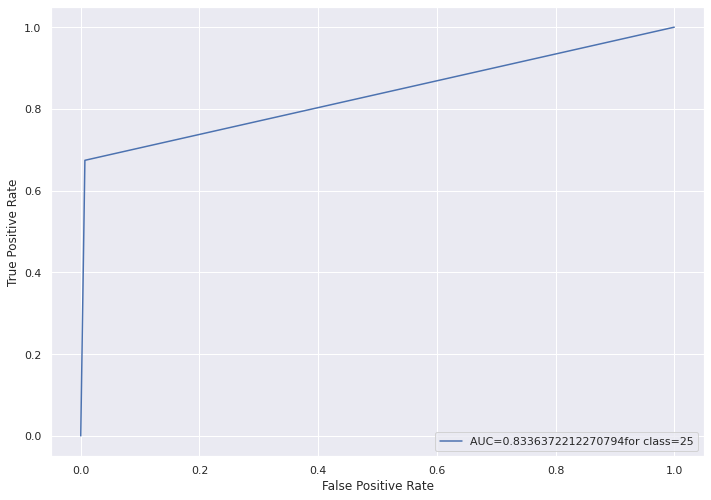

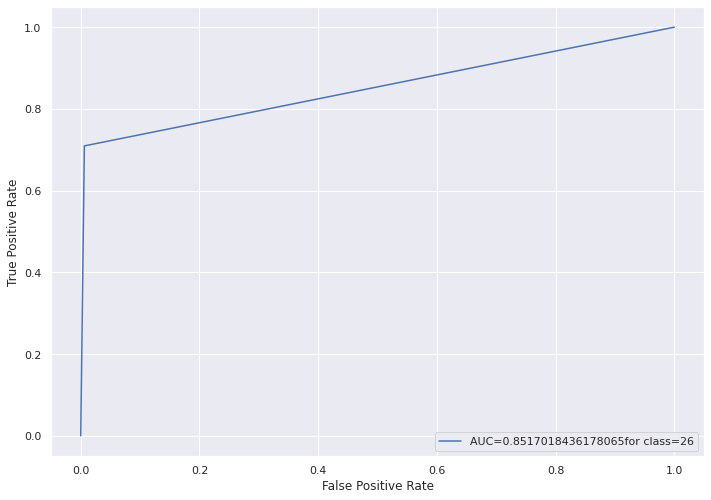

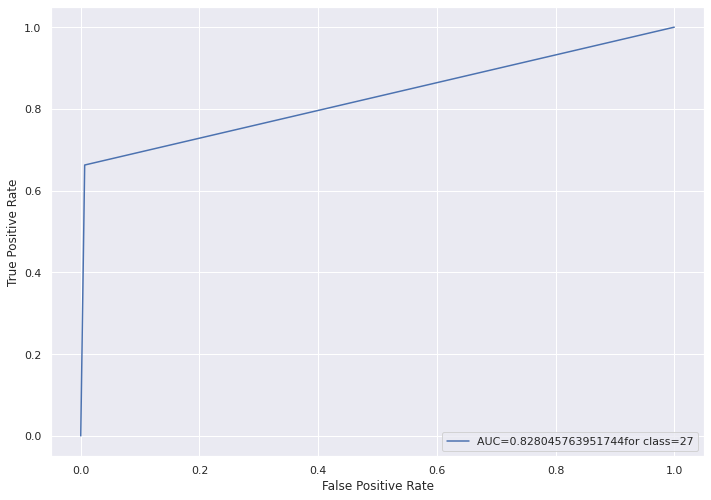

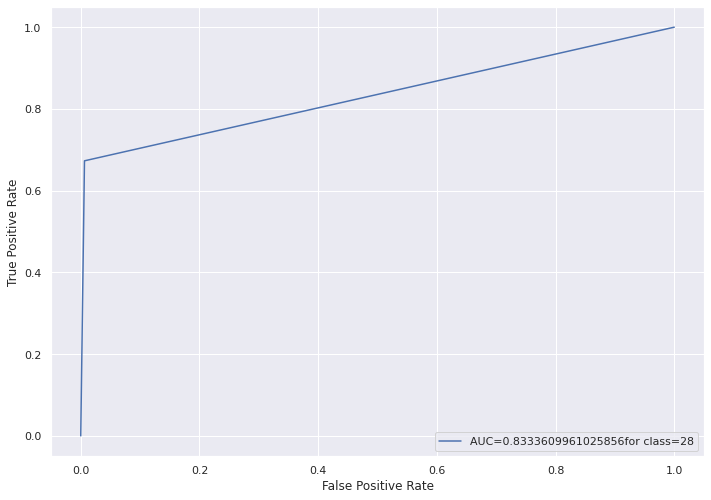

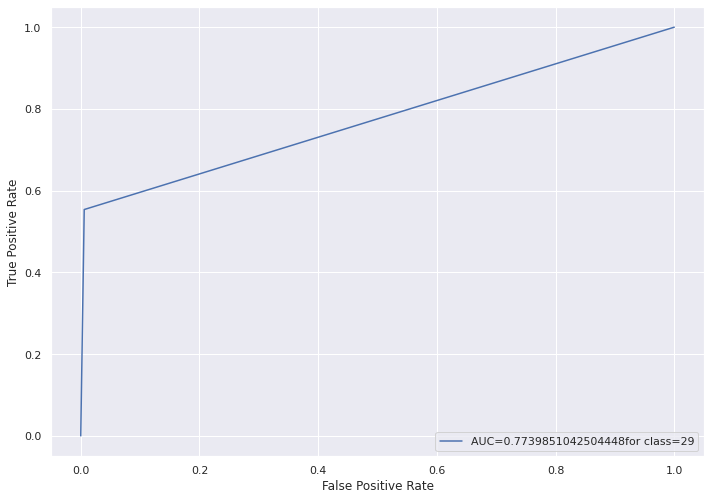

In [ ]:
roc(y_test,y_pred)

## **SVM**

In [ ]:
from sklearn.svm import SVC
svm =  SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.18      0.23      0.20       886
           2       0.46      0.38      0.42      1431
           3       0.18      0.30      0.22       697
           4       0.48      0.60      0.53       900
           5       0.24      0.42      0.31       642
           6       0.24      0.27      0.25      1020
           7       0.35      0.55      0.43       698
           8       0.32      0.15      0.20      2367
           9       0.24      0.13      0.17      2090
          10       0.31      0.18      0.23      1935
          11       0.23      0.23      0.23      1175
          12       0.26      0.25      0.26      1217
          13       0.12      0.23      0.16       600
          14       0.23      0.13      0.17      1940
          15       0.10      0.30      0.15       396
          16       0.12      0.38      0.18       352
          17       0.15      0.26      0.19       671
          18       0.48    

## **Random Forest Classifier**

In [ ]:
y_pred = rdf_random.best_estimator_.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

In [ ]:
roc(y_test,y_pred)

##Applying T-SNE to check separability of the data

In [ ]:
# from __future__ import print_function
# import time
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from mpl_toolkits.mplot3d import Axes3D


# time_start = time.time()
# tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000,learning_rate=200)
# tsne_results = tsne.fit_transform(df)

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# # N = 13611
# # rndperm = np.random.permutation(normalized_df.shape[0])
# # normalized_df_subset = normalized_df.loc[rndperm[:N],:].copy()

# df['tsne-2d-one'] = tsne_results[:,0]
# df['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue="Class",
#     palette=sns.color_palette("husl", 29),
#     data=df,
#     legend="full",
#     alpha=0.3
# )

##PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# for i in range(2,14,2):
#   # X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=0)
#   # print(X_train.shape, y_train.shape)
#   # print(i)
#   pca = PCA(n_components=i)
#   principalComponents = pca.fit_transform(X_train)
#   X_test = pca.transform(X_test)

#   # y_train=y_train.astype('int')
#   # y_test=y_test.astype('int')
#   gnb = GaussianNB()
#   y_pred = gnb.fit(principalComponents, y_train).predict(X_test)
#   # print("Retain",0.9+c,"variance:")
#   print(classification_report(y_test,y_pred))
  


  # print(pca.explained_variance_ratio_)
  # plt.scatter(principalComponents[:, 0], principalComponents[:, 1],c=next(colors), edgecolor="none", alpha=0.5,cmap=plt.cm.get_cmap("Spectral", 10))
  # plt.xlabel("Principal component 1")
  # plt.ylabel("Pricipal component 2")
  # plt.colorbar()
  # plt.show()
# X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=0)
# pca = PCA(n_components=0.99999)
# principalComponents = pca.fit_transform(X_train)
# print(pca.explained_variance_ratio_)
# X1_test = pca.transform(X_test)
# y_train=y_train.astype('int')
# y_test=y_test.astype('int')
# gnb = GaussianNB()
# y_pred = gnb.fit(principalComponents, y_train).predict(X1_test)
# print("Retain",1.0,"variance:")

# print(classification_report(y_test,y_pred))

## **ADA Boost**




In [ ]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=100)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.71      0.75      0.73      1103
           2       0.85      0.80      0.82      1258
           3       0.79      0.78      0.79      1201
           4       0.84      0.86      0.85      1110
           5       0.77      0.69      0.73      1249
           6       0.72      0.78      0.74      1074
           7       0.77      0.76      0.77      1122
           8       0.80      0.84      0.82      1063
           9       0.73      0.69      0.71      1189
          10       0.77      0.67      0.72      1289
          11       0.75      0.70      0.72      1256
          12       0.78      0.70      0.74      1270
          13       0.70      0.76      0.73      1028
          14       0.71      0.69      0.70      1124
          15       0.70      0.75      0.72      1067
          16       0.78      0.79      0.78      1099
          17       0.78      0.80      0.79      1115
          18       0.81    

## **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256,128,128,64),random_state=1, max_iter=300, )
mlp.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.71      0.75      0.73      1103
           2       0.85      0.80      0.82      1258
           3       0.79      0.78      0.79      1201
           4       0.84      0.86      0.85      1110
           5       0.77      0.69      0.73      1249
           6       0.72      0.78      0.74      1074
           7       0.77      0.76      0.77      1122
           8       0.80      0.84      0.82      1063
           9       0.73      0.69      0.71      1189
          10       0.77      0.67      0.72      1289
          11       0.75      0.70      0.72      1256
          12       0.78      0.70      0.74      1270
          13       0.70      0.76      0.73      1028
          14       0.71      0.69      0.70      1124
          15       0.70      0.75      0.72      1067
          16       0.78      0.79      0.78      1099
          17       0.78      0.80      0.79      1115
          18       0.81    

In [ ]:
y_pred = mlp.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.32      0.42      0.36       880
           2       0.63      0.68      0.66      1092
           3       0.52      0.49      0.50      1249
           4       0.56      0.58      0.57      1099
           5       0.47      0.40      0.43      1313
           6       0.31      0.43      0.36       845
           7       0.57      0.53      0.55      1201
           8       0.57      0.55      0.56      1162
           9       0.33      0.32      0.32      1207
          10       0.41      0.35      0.38      1331
          11       0.47      0.41      0.44      1350
          12       0.41      0.43      0.42      1093
          13       0.24      0.32      0.27       849
          14       0.38      0.32      0.35      1301
          15       0.24      0.32      0.28       863
          16       0.49      0.40      0.44      1370
          17       0.48      0.55      0.51       990
          18       0.59    

# **Droping less imp features**

In [ ]:
df = data.copy()

In [ ]:
df.columns

Index(['elapsedTime', ' numEvents', ' actionType', ' numCriticalPoints',
       'traveledDistance', ' endToEndLine', ' largestDeviation', ' efficiency',
       ' a_beg_time', ' sum_of_angles', 'avgv', '  sdv', '  minv', ' maxv',
       'avgvx', ' sdvx', ' minvx', ' maxvx', 'avgvy', ' sdvy', ' minvy',
       ' maxvy', 'avga', '  sda', '  mina', ' maxa', 'avg_omega', ' sd_omega',
       ' min_omega', ' max_omega', 'avg_jerk', ' sd_jerk', ' min_jerk',
       ' max_jerk', 'avg_curvature', ' sd_curvature', ' min_curvature',
       ' max_curvature', 'direction', 'userid'],
      dtype='object')

In [ ]:
X = df.drop( [' minvx', ' minvy', ' max_curvature', 'userid'], axis = 1)
Y = df['userid']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(93100, 36)

In [ ]:
from sklearn.model_selection import train_test_split
dx_train, dx_test, dy_train, dy_test = train_test_split(X, Y,  random_state = 100, test_size=0.3 , shuffle=True)

In [ ]:
dx_train.shape

(65170, 36)

In [ ]:
dy_train = np.array(dy_train)
dy_test = np.array(dy_test)

In [ ]:
dy_train.shape

(65170,)

# decision tree

In [ ]:
clf2 = DecisionTreeClassifier( criterion='gini', splitter='best', ) 
clf2.fit(dx_train,dy_train)
y_pred = clf2.predict(dx_test)
print(classification_report(y_pred, dy_test))

              precision    recall  f1-score   support

           1       0.69      0.71      0.70      1125
           2       0.79      0.77      0.78      1145
           3       0.73      0.74      0.74      1128
           4       0.79      0.82      0.80      1139
           5       0.76      0.61      0.68      1375
           6       0.69      0.70      0.69      1146
           7       0.72      0.76      0.74      1061
           8       0.74      0.79      0.76      1105
           9       0.70      0.71      0.70      1111
          10       0.71      0.71      0.71      1142
          11       0.69      0.72      0.71      1150
          12       0.71      0.71      0.71      1102
          13       0.68      0.70      0.69      1142
          14       0.69      0.68      0.68      1154
          15       0.67      0.66      0.67      1166
          16       0.77      0.78      0.78      1153
          17       0.76      0.74      0.75      1180
          18       0.75    

In [ ]:
y_pred = clf2.predict(dx_train)
print(classification_report(y_pred, dy_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2646
           2       1.00      1.00      1.00      2688
           3       1.00      1.00      1.00      2656
           4       1.00      1.00      1.00      2626
           5       1.00      0.87      0.93      3091
           6       1.00      1.00      1.00      2636
           7       1.00      1.00      1.00      2674
           8       1.00      1.00      1.00      2615
           9       1.00      1.00      1.00      2677
          10       1.00      1.00      1.00      2661
          11       1.00      1.00      1.00      2612
          12       1.00      1.00      1.00      2701
          13       1.00      1.00      1.00      2620
          14       1.00      1.00      1.00      2655
          15       1.00      1.00      1.00      2647
          16       1.00      1.00      1.00      2640
          17       1.00      1.00      1.00      2660
          18       1.00    

In [ ]:
dy_test = np.array(dy_test)

# **ADA**

In [ ]:
ada2 = AdaBoostClassifier( base_estimator = clf2, n_estimators = 150,)
ada2.fit(dx_train, dy_train)
y_pred = ada2.predict(dx_test)
print(classification_report(y_pred, dy_test))

              precision    recall  f1-score   support

           1       0.73      0.78      0.76      1078
           2       0.88      0.80      0.84      1224
           3       0.80      0.77      0.79      1186
           4       0.84      0.88      0.86      1122
           5       0.75      0.70      0.72      1195
           6       0.72      0.78      0.75      1071
           7       0.79      0.79      0.79      1124
           8       0.81      0.86      0.83      1111
           9       0.77      0.70      0.73      1226
          10       0.76      0.74      0.75      1174
          11       0.79      0.70      0.74      1326
          12       0.78      0.72      0.75      1191
          13       0.69      0.78      0.73      1046
          14       0.73      0.75      0.74      1113
          15       0.72      0.76      0.74      1088
          16       0.82      0.82      0.82      1154
          17       0.81      0.79      0.80      1160
          18       0.80    

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot= False, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

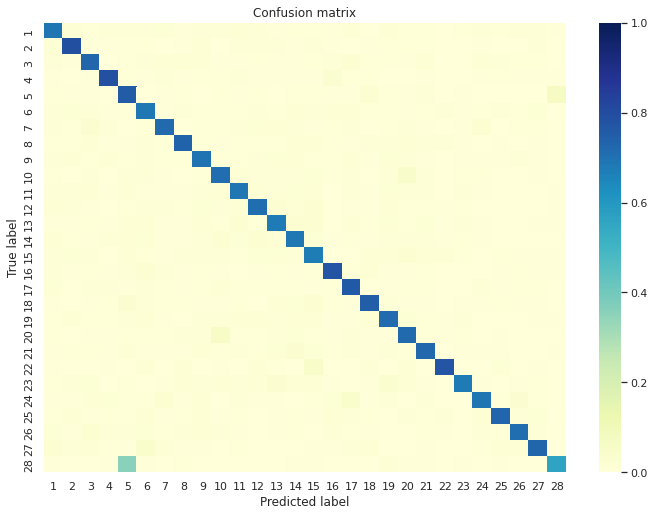

In [ ]:
y_pred = clf2.predict(dx_test)
cm = confusion_matrix(dy_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = ada2.classes_, title='Confusion matrix')

In [ ]:
y_pred = ada2.predict(dx_train)
print(classification_report(y_pred, dy_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2646
           2       1.00      1.00      1.00      2688
           3       1.00      1.00      1.00      2656
           4       1.00      1.00      1.00      2626
           5       1.00      0.87      0.93      3083
           6       1.00      1.00      1.00      2636
           7       1.00      1.00      1.00      2674
           8       1.00      1.00      1.00      2615
           9       1.00      1.00      1.00      2677
          10       1.00      1.00      1.00      2661
          11       1.00      1.00      1.00      2612
          12       1.00      1.00      1.00      2701
          13       1.00      1.00      1.00      2620
          14       1.00      1.00      1.00      2655
          15       1.00      1.00      1.00      2647
          16       1.00      1.00      1.00      2640
          17       1.00      1.00      1.00      2660
          18       1.00    

In [ ]:
y_prob = ada2.predict_proba(dx_train)
y_pred = []
y_new = []

for i in range(len(dy_train)):
  max_ind = np.argmax(y_prob[i])

  if y_prob[i][max_ind] > 0.70:
    y_new.append(dy_train[i])
    y_pred.append(max_ind + 1)

print(len(y_new))
print(classification_report(y_new, y_pred))

64015
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2646
           2       1.00      1.00      1.00      2688
           3       1.00      1.00      1.00      2656
           4       1.00      1.00      1.00      2626
           5       1.00      1.00      1.00      1936
           6       1.00      1.00      1.00      2636
           7       1.00      1.00      1.00      2674
           8       1.00      1.00      1.00      2615
           9       1.00      1.00      1.00      2677
          10       1.00      1.00      1.00      2661
          11       1.00      1.00      1.00      2612
          12       1.00      1.00      1.00      2701
          13       1.00      1.00      1.00      2620
          14       1.00      1.00      1.00      2655
          15       1.00      1.00      1.00      2647
          16       1.00      1.00      1.00      2640
          17       1.00      1.00      1.00      2660
          18       1.

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp2 = MLPClassifier(hidden_layer_sizes=(36,32),random_state=1, max_iter=300, activation = 'tanh')
mlp2.fit(dx_train, dy_train)
y_pred = mlp2.predict(dx_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(classification_report(y_pred, dy_test))

              precision    recall  f1-score   support

           1       0.23      0.26      0.25      1044
           2       0.56      0.47      0.51      1318
           3       0.44      0.28      0.35      1783
           4       0.57      0.45      0.50      1482
           5       0.20      0.33      0.25       693
           6       0.16      0.28      0.20       655
           7       0.56      0.36      0.44      1727
           8       0.44      0.49      0.46      1072
           9       0.25      0.19      0.22      1428
          10       0.41      0.22      0.29      2131
          11       0.41      0.24      0.31      2011
          12       0.37      0.32      0.35      1269
          13       0.13      0.24      0.17       658
          14       0.21      0.29      0.24       810
          15       0.12      0.24      0.16       575
          16       0.32      0.32      0.32      1150
          17       0.38      0.36      0.37      1178
          18       0.50    

In [ ]:
y_pred = mlp2.predict(dx_train)
print(classification_report(y_pred, dy_train))

              precision    recall  f1-score   support

           1       0.25      0.28      0.27      2324
           2       0.58      0.48      0.53      3256
           3       0.47      0.30      0.37      4148
           4       0.56      0.45      0.50      3289
           5       0.23      0.39      0.29      1596
           6       0.21      0.33      0.25      1624
           7       0.59      0.39      0.47      4108
           8       0.45      0.48      0.47      2469
           9       0.24      0.20      0.22      3134
          10       0.45      0.24      0.31      5054
          11       0.43      0.24      0.31      4697
          12       0.37      0.35      0.36      2902
          13       0.14      0.24      0.18      1546
          14       0.22      0.32      0.26      1854
          15       0.13      0.25      0.17      1353
          16       0.35      0.35      0.35      2652
          17       0.39      0.39      0.39      2705
          18       0.51    

In [ ]:
y_prob[0].shape

(28,)

In [ ]:
dy_test = np.array(dy_test)

In [ ]:
dy_test[:10]

array([19,  4, 19, 24, 16, 26,  5,  9, 27,  4])

In [ ]:
y_pred = []
y_new = []

for i in range(len(dy_test)):
  max_ind = np.argmax(y_prob[i])

  if y_prob[i][max_ind] > 0.85:
    y_new.append(dy_test[i])
    y_pred.append(max_ind + 1)

print(len(y_new))
print(classification_report(y_new, y_pred))

15273
              precision    recall  f1-score   support

           1       0.78      0.77      0.77       640
           2       0.87      0.87      0.87       686
           3       0.80      0.81      0.80       710
           4       0.92      0.88      0.90       790
           5       0.66      0.79      0.72       468
           6       0.72      0.76      0.74       626
           7       0.84      0.81      0.83       737
           8       0.87      0.84      0.86       767
           9       0.72      0.77      0.74       542
          10       0.77      0.77      0.77       556
          11       0.78      0.82      0.80       632
          12       0.80      0.81      0.81       587
          13       0.82      0.76      0.79       607
          14       0.76      0.77      0.77       530
          15       0.76      0.70      0.73       509
          16       0.82      0.81      0.81       647
          17       0.82      0.87      0.85       722
          18       0.

# **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
search_space = {
    
        "n_estimators" : [ 100, 150, 200, 175],
        "learning_rate" : [1, 0.5, 0.01, 0.1]
}

In [ ]:
ada3 = AdaBoostClassifier( base_estimator = clf2)

In [ ]:
GS = GridSearchCV(estimator = ada3,
                  param_grid = search_space,
                  cv = 4, verbose = 4)


In [ ]:
GS.fit(dx_train, dy_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END .learning_rate=1, n_estimators=100;, score=0.704 total time= 4.5min
[CV 2/4] END .learning_rate=1, n_estimators=100;, score=0.700 total time= 4.6min
[CV 3/4] END .learning_rate=1, n_estimators=100;, score=0.695 total time= 4.9min
[CV 4/4] END .learning_rate=1, n_estimators=100;, score=0.704 total time= 4.1min
[CV 1/4] END .learning_rate=1, n_estimators=150;, score=0.708 total time= 6.2min
[CV 2/4] END .learning_rate=1, n_estimators=150;, score=0.700 total time= 7.0min
[CV 3/4] END .learning_rate=1, n_estimators=150;, score=0.704 total time= 6.1min
[CV 4/4] END .learning_rate=1, n_estimators=150;, score=0.704 total time= 6.2min
[CV 1/4] END .learning_rate=1, n_estimators=200;, score=0.709 total time= 8.6min
[CV 2/4] END .learning_rate=1, n_estimators=200;, score=0.710 total time= 9.0min
[CV 3/4] END .learning_rate=1, n_estimators=200;, score=0.706 total time= 8.9min
[CV 4/4] END .learning_rate=1, n_estimators=200;

# **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf2 = RandomForestClassifier( )
rdf2.fit(dx_train, dy_train)
y_pred = rdf2.predict(dx_test)
print(classification_report(y_pred, dy_test))

              precision    recall  f1-score   support

           1       0.72      0.76      0.74      1090
           2       0.87      0.79      0.83      1228
           3       0.82      0.75      0.78      1244
           4       0.84      0.87      0.86      1138
           5       0.72      0.71      0.72      1143
           6       0.72      0.77      0.74      1088
           7       0.77      0.78      0.78      1115
           8       0.81      0.86      0.84      1114
           9       0.77      0.70      0.73      1239
          10       0.77      0.70      0.73      1254
          11       0.76      0.72      0.74      1264
          12       0.77      0.75      0.76      1135
          13       0.70      0.78      0.74      1068
          14       0.74      0.75      0.75      1131
          15       0.72      0.76      0.74      1084
          16       0.83      0.80      0.81      1194
          17       0.82      0.82      0.82      1139
          18       0.79    

In [ ]:
y_pred = rdf2.predict(dx_train)
print(classification_report(y_pred, dy_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2646
           2       1.00      1.00      1.00      2688
           3       1.00      1.00      1.00      2656
           4       1.00      1.00      1.00      2626
           5       0.97      0.89      0.93      2949
           6       1.00      1.00      1.00      2636
           7       1.00      1.00      1.00      2674
           8       1.00      1.00      1.00      2615
           9       1.00      1.00      1.00      2677
          10       1.00      1.00      1.00      2661
          11       1.00      1.00      1.00      2612
          12       1.00      1.00      1.00      2701
          13       1.00      1.00      1.00      2620
          14       1.00      1.00      1.00      2655
          15       1.00      1.00      1.00      2647
          16       1.00      1.00      1.00      2640
          17       1.00      1.00      1.00      2660
          18       1.00    

In [ ]:
y_prob = rdf2.predict_proba(dx_train)

In [ ]:
y_pred = []
y_new = []

for i in range(len(dy_train)):
  max_ind = np.argmax(y_prob[i])

  if y_prob[i][max_ind] > 0.2:
    y_new.append(dy_train[i])
    y_pred.append(max_ind + 1)

print(len(y_new))
print(classification_report(y_new, y_pred))

65170
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2646
           2       1.00      1.00      1.00      2688
           3       1.00      1.00      1.00      2656
           4       1.00      1.00      1.00      2626
           5       0.89      0.97      0.93      2683
           6       1.00      1.00      1.00      2636
           7       1.00      1.00      1.00      2674
           8       1.00      1.00      1.00      2615
           9       1.00      1.00      1.00      2677
          10       1.00      1.00      1.00      2661
          11       1.00      1.00      1.00      2612
          12       1.00      1.00      1.00      2701
          13       1.00      1.00      1.00      2620
          14       1.00      1.00      1.00      2655
          15       1.00      1.00      1.00      2647
          16       1.00      1.00      1.00      2640
          17       1.00      1.00      1.00      2660
          18       1.

# **Lightgbm**

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(dx_train, dy_train)

LGBMClassifier()

In [ ]:
y_pred = clf.predict(dx_test)
print(classification_report(y_pred, dy_test))

              precision    recall  f1-score   support

           1       0.48      0.62      0.54       888
           2       0.79      0.69      0.74      1262
           3       0.67      0.60      0.63      1274
           4       0.73      0.73      0.73      1175
           5       0.48      0.55      0.51       966
           6       0.46      0.60      0.52       902
           7       0.72      0.63      0.67      1282
           8       0.68      0.74      0.71      1095
           9       0.63      0.52      0.57      1345
          10       0.56      0.52      0.54      1243
          11       0.62      0.54      0.58      1364
          12       0.60      0.57      0.58      1151
          13       0.44      0.56      0.49       936
          14       0.53      0.58      0.55      1043
          15       0.49      0.55      0.52      1015
          16       0.63      0.67      0.65      1098
          17       0.64      0.65      0.65      1119
          18       0.70    

In [ ]:
y_pred = clf.predict(dx_train)
print(classification_report(y_pred, dy_train))

              precision    recall  f1-score   support

           1       0.66      0.82      0.73      2135
           2       0.89      0.79      0.84      3028
           3       0.83      0.78      0.80      2838
           4       0.87      0.86      0.87      2644
           5       0.69      0.79      0.73      2345
           6       0.67      0.81      0.74      2177
           7       0.86      0.78      0.82      2941
           8       0.82      0.84      0.83      2539
           9       0.77      0.70      0.73      2935
          10       0.78      0.73      0.76      2845
          11       0.79      0.70      0.74      2919
          12       0.79      0.71      0.75      2989
          13       0.67      0.78      0.72      2260
          14       0.71      0.78      0.74      2440
          15       0.69      0.77      0.73      2391
          16       0.80      0.80      0.80      2659
          17       0.80      0.82      0.81      2595
          18       0.83    